# Importing Libraries

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')
from tqdm import tqdm

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

from xgboost import *
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error

import pickle

# Importing Dataset

In [2]:
df=pd.read_csv('predictive_maintenance.csv')
df.head()

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,No Failure
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,No Failure
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,No Failure
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,No Failure
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,No Failure


# EDA

In [3]:
df.shape

(10000, 10)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      10000 non-null  int64  
 1   Product ID               10000 non-null  object 
 2   Type                     10000 non-null  object 
 3   Air temperature [K]      10000 non-null  float64
 4   Process temperature [K]  10000 non-null  float64
 5   Rotational speed [rpm]   10000 non-null  int64  
 6   Torque [Nm]              10000 non-null  float64
 7   Tool wear [min]          10000 non-null  int64  
 8   Target                   10000 non-null  int64  
 9   Failure Type             10000 non-null  object 
dtypes: float64(3), int64(4), object(3)
memory usage: 781.4+ KB


In [5]:
print(df.isna().sum())
print("The total number of null values in the dataset is:",df.isna().sum().sum())

UDI                        0
Product ID                 0
Type                       0
Air temperature [K]        0
Process temperature [K]    0
Rotational speed [rpm]     0
Torque [Nm]                0
Tool wear [min]            0
Target                     0
Failure Type               0
dtype: int64
The total number of null values in the dataset is: 0


In [6]:
print("Total number of duplicate values in dataset:",df.duplicated().sum())

Total number of duplicate values in dataset: 0


In [7]:
print("Unique Values in each column:")
print("-"*30)
df.nunique()

Unique Values in each column:
------------------------------


UDI                        10000
Product ID                 10000
Type                           3
Air temperature [K]           93
Process temperature [K]       82
Rotational speed [rpm]       941
Torque [Nm]                  577
Tool wear [min]              246
Target                         2
Failure Type                   6
dtype: int64

In [8]:
print("Type:",df['Type'].unique())
print("Target:",df['Target'].unique())
print("Failure Type:",df['Failure Type'].unique())

Type: ['M' 'L' 'H']
Target: [0 1]
Failure Type: ['No Failure' 'Power Failure' 'Tool Wear Failure' 'Overstrain Failure'
 'Random Failures' 'Heat Dissipation Failure']


In [9]:
df.describe()

,UDI,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,300.004930,310.005560,1538.776100,39.986910,107.951000,0.033900
std,2886.89568,2.000259,1.483734,179.284096,9.968934,63.654147,0.180981
min,1.00000,295.300000,305.700000,1168.000000,3.800000,0.000000,0.000000
25%,2500.75000,298.300000,308.800000,1423.000000,33.200000,53.000000,0.000000
50%,5000.50000,300.100000,310.100000,1503.000000,40.100000,108.000000,0.000000
75%,7500.25000,301.500000,311.100000,1612.000000,46.800000,162.000000,0.000000
max,10000.00000,304.500000,313.800000,2886.000000,76.600000,253.000000,1.000000


# Data Visualisation

In [10]:
df.drop(['UDI','Product ID'],axis=1,inplace=True)
df.head()

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,M,298.1,308.6,1551,42.8,0,0,No Failure
1,L,298.2,308.7,1408,46.3,3,0,No Failure
2,L,298.1,308.5,1498,49.4,5,0,No Failure
3,L,298.2,308.6,1433,39.5,7,0,No Failure
4,L,298.2,308.7,1408,40.0,9,0,No Failure


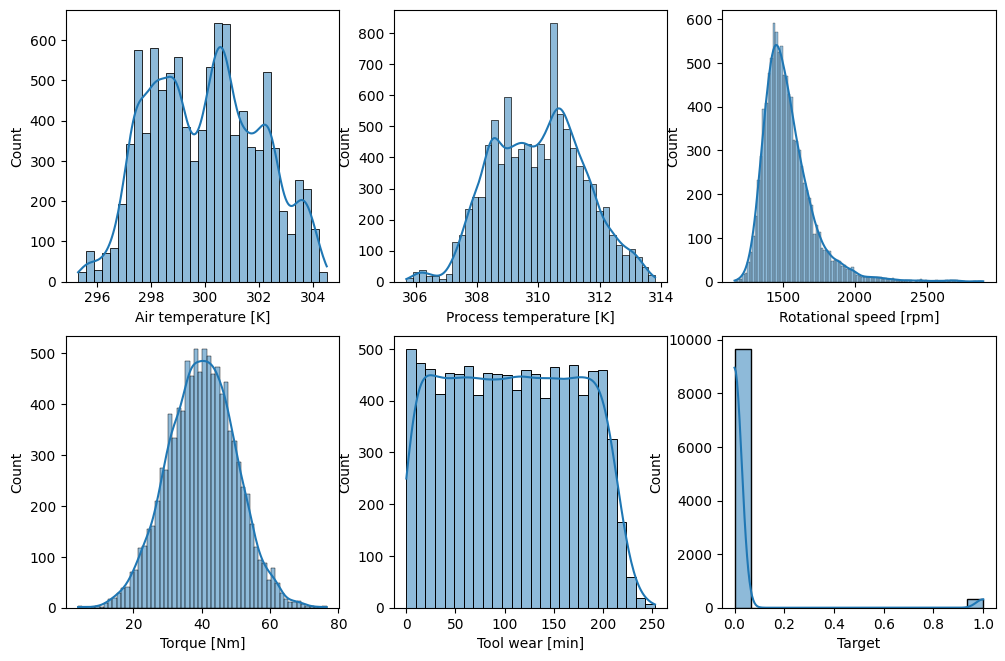

In [11]:
plt.figure(figsize=(12,12))
col=['Air temperature [K]', 'Process temperature [K]',
       'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]', 'Target']
l=list(enumerate(col))

for i in l:
    plt.subplot(3,3,i[0]+1)
    sns.histplot(df[i[1]],kde=True)

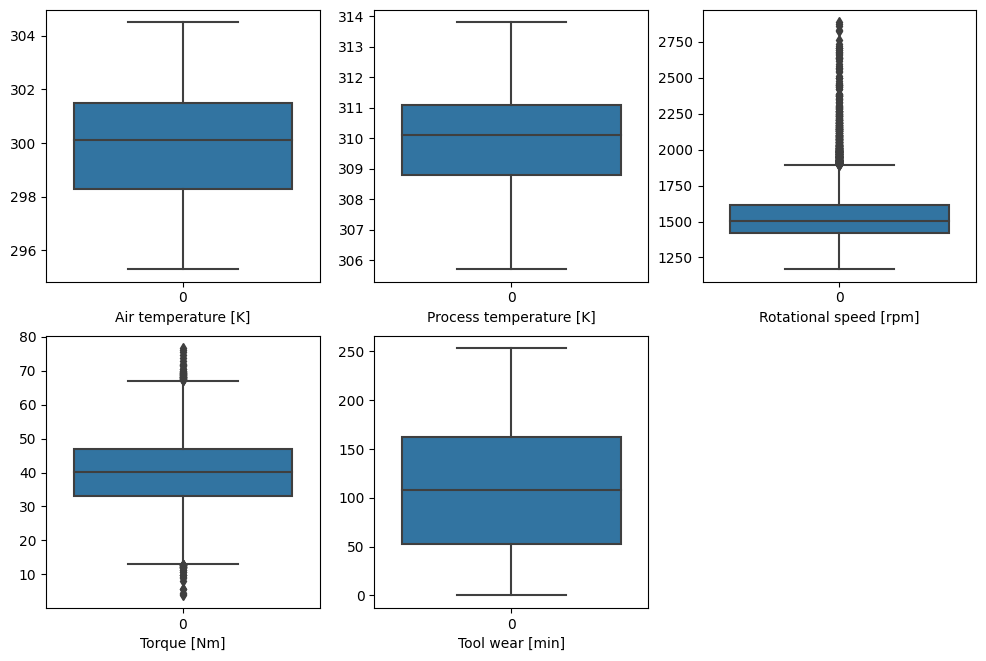

In [12]:
plt.figure(figsize=(12,12))
col=['Air temperature [K]', 'Process temperature [K]',
       'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]']
l=list(enumerate(col))

for i in l:
    plt.subplot(3,3,i[0]+1)
    sns.boxplot(df[i[1]])
    plt.xlabel(i[1])

<Axes: >

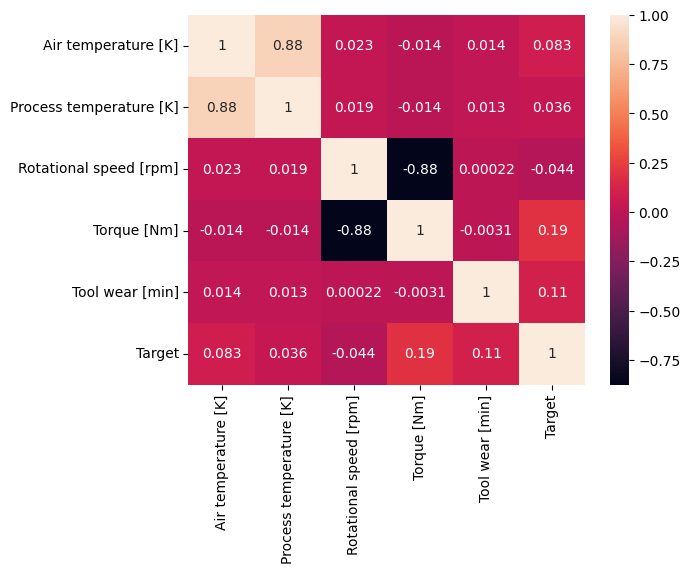

In [13]:
sns.heatmap(df.corr(),annot=True)

0    9661
1     339
Name: Target, dtype: int64


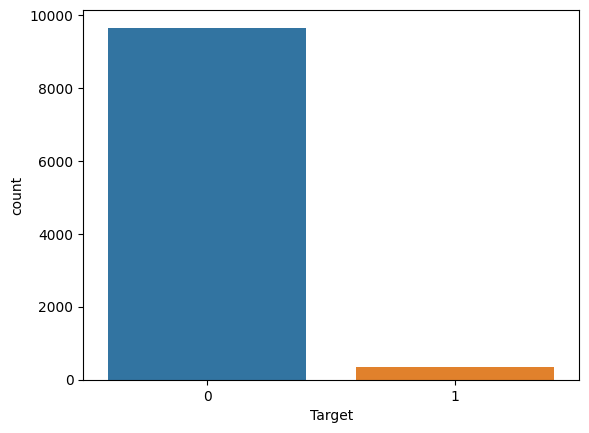

In [14]:
print(df['Target'].value_counts())
sns.countplot(x='Target',data=df)
plt.show()

No Failure                  9652
Heat Dissipation Failure     112
Power Failure                 95
Overstrain Failure            78
Tool Wear Failure             45
Random Failures               18
Name: Failure Type, dtype: int64


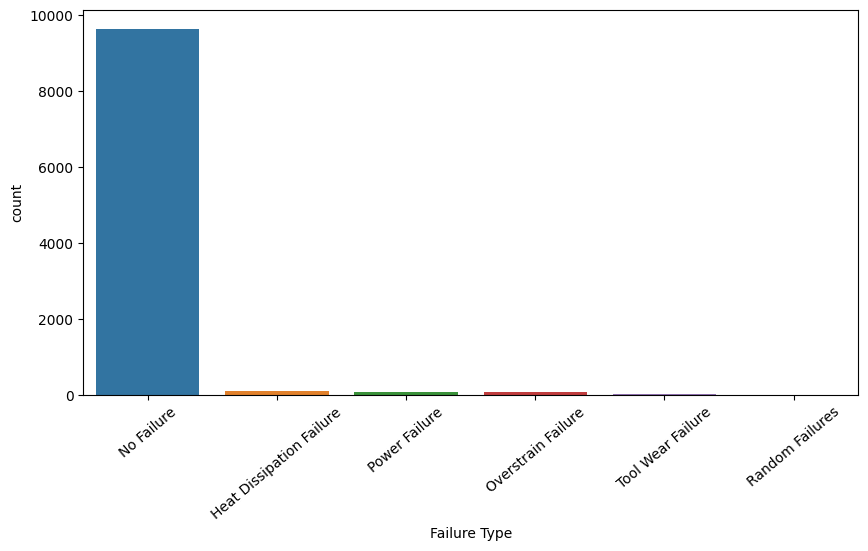

In [15]:
plt.figure(figsize=(10,5))
print(df['Failure Type'].value_counts())
plt.xticks(rotation=40)
sns.countplot(x='Failure Type',data=df,order=df['Failure Type'].value_counts().index)
plt.show()


<Axes: xlabel='Torque [Nm]', ylabel='Target'>

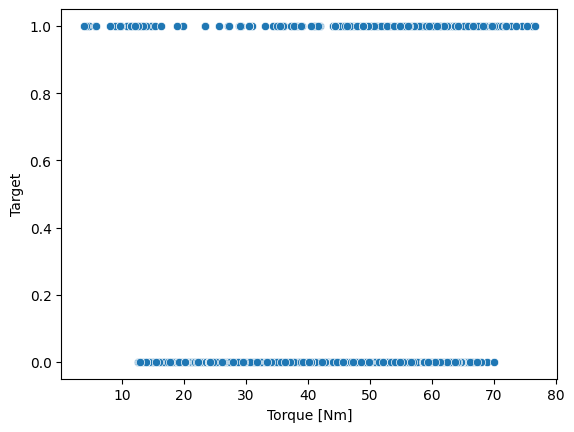

In [16]:
sns.scatterplot(x="Torque [Nm]", y="Target", data=df)

# Dealing With Outliers

In [17]:
q=df['Rotational speed [rpm]'].quantile(.97)
df=df[df['Rotational speed [rpm]']<q]


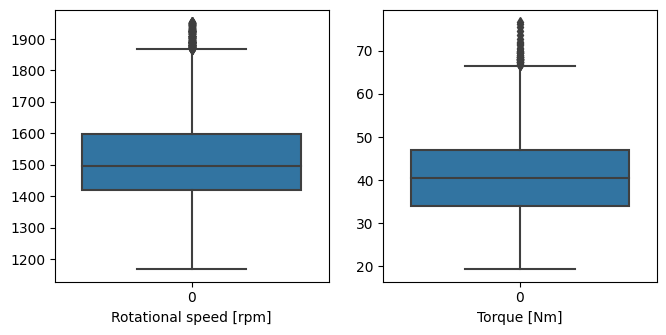

In [18]:
plt.figure(figsize=(12,12))
col=['Rotational speed [rpm]', 'Torque [Nm]']
l=list(enumerate(col))

for i in l:
    plt.subplot(3,3,i[0]+1)
    sns.boxplot(df[i[1]])
    plt.xlabel(i[1])

In [19]:
q=df['Torque [Nm]'].quantile(.98)
df=df[df['Torque [Nm]']<q]


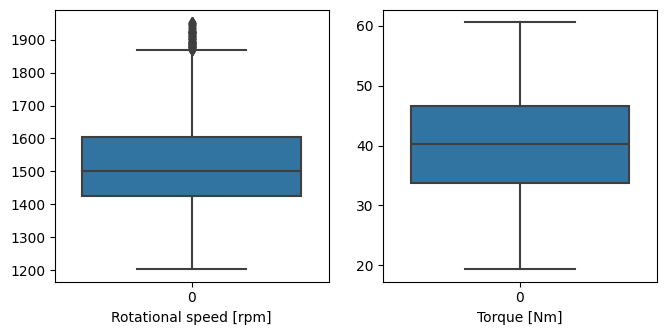

In [20]:
plt.figure(figsize=(12,12))
col=['Rotational speed [rpm]', 'Torque [Nm]']
l=list(enumerate(col))

for i in l:
    plt.subplot(3,3,i[0]+1)
    sns.boxplot(df[i[1]])
    plt.xlabel(i[1])

# Encoding The Columns

## One Hot Encoding

In [21]:
df.head()

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,M,298.1,308.6,1551,42.8,0,0,No Failure
1,L,298.2,308.7,1408,46.3,3,0,No Failure
2,L,298.1,308.5,1498,49.4,5,0,No Failure
3,L,298.2,308.6,1433,39.5,7,0,No Failure
4,L,298.2,308.7,1408,40.0,9,0,No Failure


In [22]:
df=pd.get_dummies(df,columns=['Type'])

In [23]:
df.head()

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type,Type_H,Type_L,Type_M
0,298.1,308.6,1551,42.8,0,0,No Failure,0,0,1
1,298.2,308.7,1408,46.3,3,0,No Failure,0,1,0
2,298.1,308.5,1498,49.4,5,0,No Failure,0,1,0
3,298.2,308.6,1433,39.5,7,0,No Failure,0,1,0
4,298.2,308.7,1408,40.0,9,0,No Failure,0,1,0


## Label Encoding

In [24]:
le=LabelEncoder()
df['Failure Type']=le.fit_transform(df['Failure Type'])

In [25]:
df.head()

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type,Type_H,Type_L,Type_M
0,298.1,308.6,1551,42.8,0,0,1,0,0,1
1,298.2,308.7,1408,46.3,3,0,1,0,1,0
2,298.1,308.5,1498,49.4,5,0,1,0,1,0
3,298.2,308.6,1433,39.5,7,0,1,0,1,0
4,298.2,308.7,1408,40.0,9,0,1,0,1,0


In [26]:
print(df['Failure Type'].value_counts())

1    9282
0      97
2      58
5      41
4      17
3       5
Name: Failure Type, dtype: int64


In [27]:
df.head()

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type,Type_H,Type_L,Type_M
0,298.1,308.6,1551,42.8,0,0,1,0,0,1
1,298.2,308.7,1408,46.3,3,0,1,0,1,0
2,298.1,308.5,1498,49.4,5,0,1,0,1,0
3,298.2,308.6,1433,39.5,7,0,1,0,1,0
4,298.2,308.7,1408,40.0,9,0,1,0,1,0


# Splitting

In [28]:
X=df.drop(['Target','Failure Type'],axis=1)
y=df['Failure Type']


In [29]:
xtrain,xtest,ytrain,ytest=train_test_split(X,y,random_state=42,test_size=0.3)
xtrain.shape,xtest.shape,ytrain.shape,ytest.shape


((6650, 8), (2850, 8), (6650,), (2850,))

# Feature Importance

In [30]:
from sklearn.ensemble import ExtraTreesClassifer
model=ExtraTreesClassifier()
model.fit(xtrain,ytrain)
col=['Air temperature [K]', 'Process temperature [K]',
       'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]', 'Type_H','Type_L','Type_M']
feature_imp=pd.Series(model.feature_importances_,index=col)
feature_imp.sort_values(ascending=False)

Tool wear [min]            0.232217
Torque [Nm]                0.211078
Rotational speed [rpm]     0.201035
Air temperature [K]        0.180423
Process temperature [K]    0.157108
Type_L                     0.008063
Type_M                     0.006039
Type_H                     0.004037
dtype: float64

<Axes: >

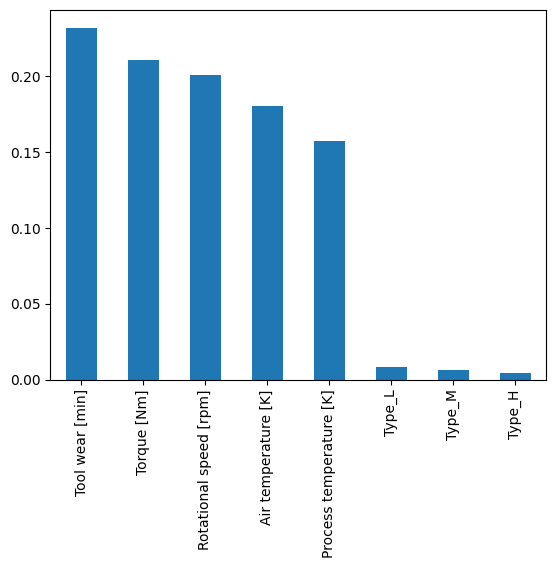

In [31]:
feature_imp.sort_values(ascending=False).plot(kind='bar')

# Model Training

## Random Forest

Data Accuracy
--------------------
ACCURACY SCORE: 98.42105263157895 %
ERROR: 0.036491228070175435
CLASSIFICATION REPORT:
              precision    recall  f1-score   support

           0       0.89      0.55      0.68        31
           1       0.99      1.00      0.99      2787
           2       0.57      0.40      0.47        10
           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         7
           5       0.00      0.00      0.00        14

    accuracy                           0.98      2850
   macro avg       0.41      0.32      0.36      2850
weighted avg       0.98      0.98      0.98      2850

CONFUSION MATRIX: Axes(0.125,0.11;0.62x0.77)


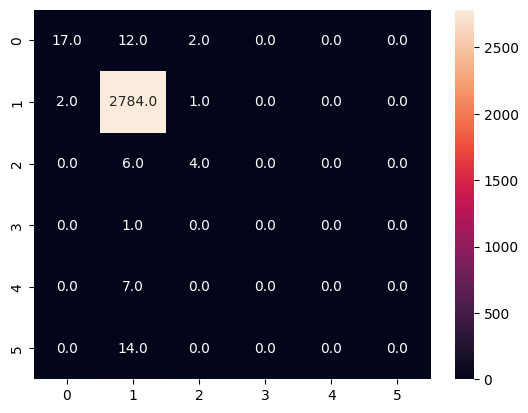

In [32]:
from sklearn.model_selection import RandomizedSearchCV
parameters={
    'n_estimators':np.arange(20,101,10),
    'max_depth':np.arange(2,17,2)
}

rf=RandomForestClassifier()
rf_rs=RandomizedSearchCV(rf,param_distributions=parameters,cv=4,random_state=42)
rf_rs.fit(xtrain,ytrain)
pred=rf_rs.predict(xtest)
rfacc=accuracy_score(ytest,pred)*100

print('Data Accuracy')
print('-'*20)
print("ACCURACY SCORE:",accuracy_score(ytest,pred)*100,"%")
print("ERROR:",mean_absolute_error(ytest,pred))
print("CLASSIFICATION REPORT:")
print(classification_report(ytest,pred))
print("CONFUSION MATRIX:",sns.heatmap(confusion_matrix(ytest,pred),annot=True,fmt='.1f'))
plt.show()

## Logistic Regression

Data Accuracy
--------------------
ACCURACY SCORE: 97.85964912280701 %
ERROR: 0.0431578947368421
CLASSIFICATION REPORT:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        31
           1       0.98      1.00      0.99      2787
           2       0.54      0.70      0.61        10
           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         7
           5       0.00      0.00      0.00        14

    accuracy                           0.98      2850
   macro avg       0.25      0.28      0.27      2850
weighted avg       0.96      0.98      0.97      2850

CONFUSION MATRIX: Axes(0.125,0.11;0.62x0.77)


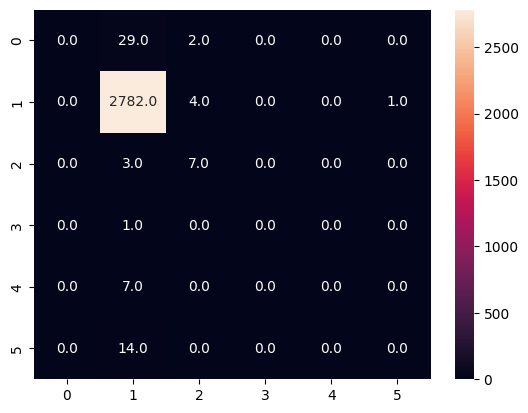

In [33]:
parameters={'max_iter':[100,200,500]}
lr=LogisticRegression()
lr_rs=RandomizedSearchCV(lr,param_distributions=parameters,cv=5,random_state=42)
lr_rs.fit(xtrain,ytrain)
pred=lr_rs.predict(xtest)
lracc=accuracy_score(ytest,pred)*100

print('Data Accuracy')
print('-'*20)
print("ACCURACY SCORE:",accuracy_score(ytest,pred)*100,"%")
print("ERROR:",mean_absolute_error(ytest,pred))
print("CLASSIFICATION REPORT:")
print(classification_report(ytest,pred))
print("CONFUSION MATRIX:",sns.heatmap(confusion_matrix(ytest,pred),annot=True,fmt='.1f'))
plt.show()

## SVC 

Data Accuracy
--------------------
ACCURACY SCORE: 98.59649122807016 %
ERROR: 0.034736842105263156
CLASSIFICATION REPORT:
              precision    recall  f1-score   support

           0       0.94      0.48      0.64        31
           1       0.99      1.00      0.99      2787
           2       0.89      0.80      0.84        10
           3       0.50      1.00      0.67         1
           4       0.00      0.00      0.00         7
           5       0.00      0.00      0.00        14

    accuracy                           0.99      2850
   macro avg       0.55      0.55      0.52      2850
weighted avg       0.98      0.99      0.98      2850

CONFUSION MATRIX: Axes(0.125,0.11;0.62x0.77)


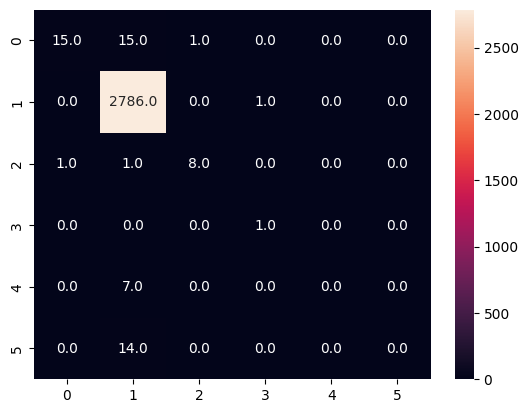

In [34]:
parameters={
    'kernel':['linear','rbf','poly','sigmoid'],
    'C':[100,5]
}

svm_rs=RandomizedSearchCV(SVC(),param_distributions=parameters,cv=3,random_state=43)
svm_rs.fit(xtrain,ytrain)
pred=svm_rs.predict(xtest)
svcacc=accuracy_score(ytest,pred)*100

print('Data Accuracy')
print('-'*20)
print("ACCURACY SCORE:",accuracy_score(ytest,pred)*100,"%")
print("ERROR:",mean_absolute_error(ytest,pred))
print("CLASSIFICATION REPORT:")
print(classification_report(ytest,pred))
print("CONFUSION MATRIX:",sns.heatmap(confusion_matrix(ytest,pred),annot=True,fmt='.1f'))
plt.show()

## KNN

Data Accuracy
--------------------
ACCURACY SCORE: 97.50877192982456 %
ERROR: 0.049473684210526316
CLASSIFICATION REPORT:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        31
           1       0.98      1.00      0.99      2787
           2       0.38      0.50      0.43        10
           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         7
           5       0.00      0.00      0.00        14

    accuracy                           0.98      2850
   macro avg       0.23      0.25      0.24      2850
weighted avg       0.96      0.98      0.97      2850

CONFUSION MATRIX: Axes(0.125,0.11;0.62x0.77)


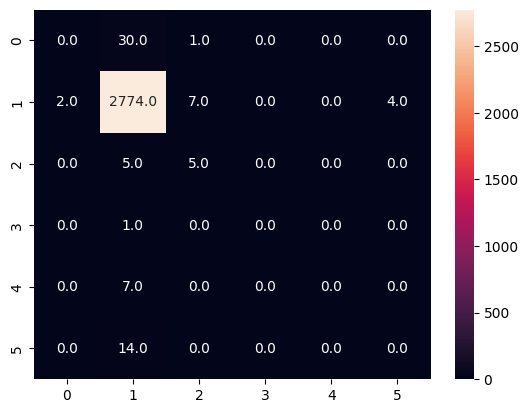

In [50]:
knn=KNeighborsClassifier(n_neighbors=3)
knn_model=knn.fit(xtrain,ytrain)
knn_model
pred=knn_model.predict(xtest)
knnacc=accuracy_score(ytest,pred)*100

print('Data Accuracy')
print('-'*20)
print("ACCURACY SCORE:",accuracy_score(ytest,pred)*100,"%")
print("ERROR:",mean_absolute_error(ytest,pred))
print("CLASSIFICATION REPORT:")
print(classification_report(ytest,pred))
print("CONFUSION MATRIX:",sns.heatmap(confusion_matrix(ytest,pred),annot=True,fmt='.1f'))
plt.show()

## AdaBoost

Data Accuracy
--------------------
ACCURACY SCORE: 96.91228070175438 %
ERROR: 0.05087719298245614
CLASSIFICATION REPORT:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        31
           1       0.98      0.99      0.98      2787
           2       0.00      0.00      0.00        10
           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         7
           5       0.00      0.00      0.00        14

    accuracy                           0.97      2850
   macro avg       0.16      0.17      0.16      2850
weighted avg       0.96      0.97      0.96      2850

CONFUSION MATRIX: Axes(0.125,0.11;0.62x0.77)


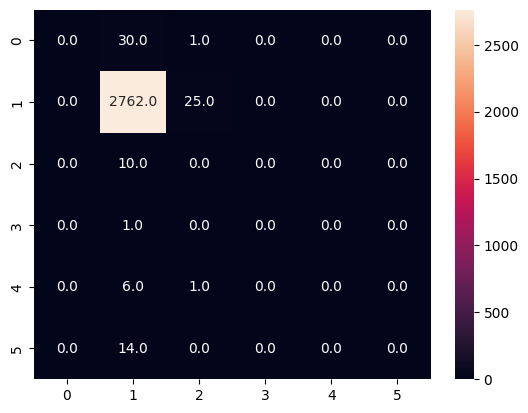

In [51]:
from sklearn.ensemble import AdaBoostClassifier
adb=AdaBoostClassifier()
adb_model=adb.fit(xtrain,ytrain)
adb_model
pred=adb_model.predict(xtest)
adbacc=accuracy_score(ytest,pred)*100

print('Data Accuracy')
print('-'*20)
print("ACCURACY SCORE:",accuracy_score(ytest,pred)*100,"%")
print("ERROR:",mean_absolute_error(ytest,pred))
print("CLASSIFICATION REPORT:")
print(classification_report(ytest,pred))
print("CONFUSION MATRIX:",sns.heatmap(confusion_matrix(ytest,pred),annot=True,fmt='.1f'))
plt.show()

## Artificial Neural Network

In [67]:
import tensorflow as tf
from tensorflow import keras

model=keras.Sequential([
    keras.layers.Dense(40,input_shape=(8,),activation='relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(20,activation='relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(10,activation='relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(5,activation='relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(1,activation='sigmoid')
])

model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
model.fit(xtrain,ytrain,epochs=15)


Epoch 1/15
208/208 [==============================] - 2s 3ms/step - loss: 0.8578 - accuracy: 0.8206
Epoch 2/15
208/208 [==============================] - 1s 3ms/step - loss: -48.4293 - accuracy: 0.9579
Epoch 3/15
208/208 [==============================] - 0s 2ms/step - loss: -407.6754 - accuracy: 0.9744
Epoch 4/15
208/208 [==============================] - 0s 2ms/step - loss: -2355.5918 - accuracy: 0.9761
Epoch 5/15
208/208 [==============================] - 0s 2ms/step - loss: -9692.6680 - accuracy: 0.9764
Epoch 6/15
208/208 [==============================] - 0s 2ms/step - loss: -29336.3555 - accuracy: 0.9765
Epoch 7/15
208/208 [==============================] - 0s 2ms/step - loss: -80997.8047 - accuracy: 0.9765
Epoch 8/15
208/208 [==============================] - 0s 2ms/step - loss: -155120.2344 - accuracy: 0.9767
Epoch 9/15
208/208 [==============================] - 0s 2ms/step - loss: -294781.4062 - accuracy: 0.9765
Epoch 10/15
208/208 [==============================] - 0s 2ms/ste

In [68]:
model.evaluate(xtest,ytest)

90/90 [==============================] - 0s 2ms/step - loss: -4595536.5000 - accuracy: 0.9779


[-4595536.5, 0.9778947234153748]

90/90 [==============================] - 0s 1ms/step
Data Accuracy
--------------------
ACCURACY SCORE: 97.78947368421052 %
ERROR: 0.042105263157894736
CLASSIFICATION REPORT:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        31
           1       0.98      1.00      0.99      2787
           2       0.00      0.00      0.00        10
           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         7
           5       0.00      0.00      0.00        14

    accuracy                           0.98      2850
   macro avg       0.16      0.17      0.16      2850
weighted avg       0.96      0.98      0.97      2850

CONFUSION MATRIX: Axes(0.125,0.11;0.62x0.77)


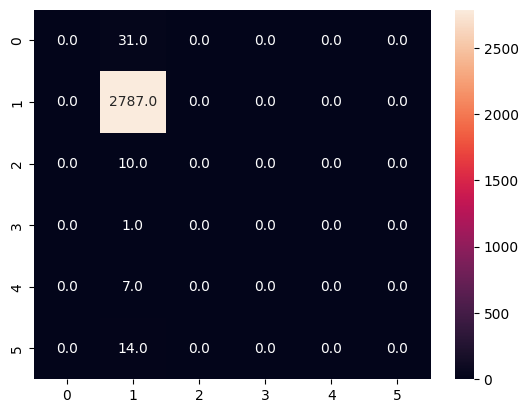

In [70]:
pred=model.predict(xtest)
annacc=accuracy_score(np.round_(pred),ytest)*100

print('Data Accuracy')
print('-'*20)
print("ACCURACY SCORE:",accuracy_score(ytest,pred)*100,"%")
print("ERROR:",mean_absolute_error(ytest,pred))
print("CLASSIFICATION REPORT:")
print(classification_report(ytest,pred))
print("CONFUSION MATRIX:",sns.heatmap(confusion_matrix(ytest,pred),annot=True,fmt='.1f'))
plt.show()

# Model Evaluation

In [71]:
final=pd.DataFrame({
    'Model':['Random Forest','Logistic Regression','SVC','KNN','AdaBoost','annacc'],
    'Accuracy Score':[rfacc,lracc,svcacc,knnacc,adbacc,annacc]
})
final.sort_values(by='Accuracy Score',ascending=False)

,Model,Accuracy Score
2,SVC,98.596491
0,Random Forest,98.421053
1,Logistic Regression,97.859649
5,annacc,97.789474
3,KNN,97.508772
4,AdaBoost,96.912281


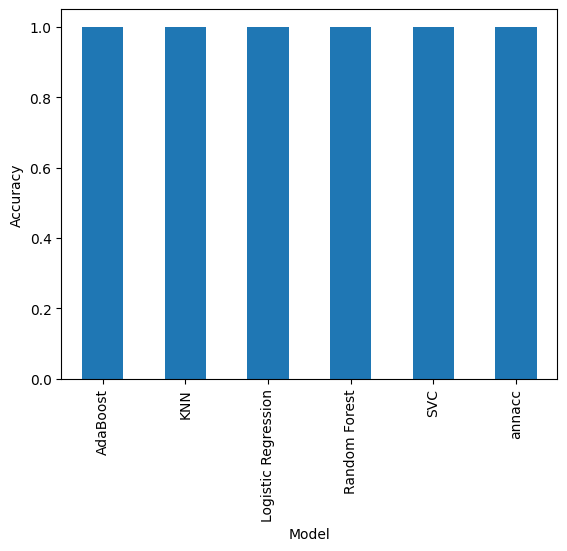

In [72]:
final.groupby(['Model']).count()['Accuracy Score'].sort_values(ascending=True).plot(kind='bar')
plt.ylabel('Accuracy')
plt.show()

# Concusion

# Pickle

In [74]:
pickle.dump(df,open('data.pkl','wb'))
pickle.dump(svm_rs,open('model.pkl','wb'))

In [76]:
df.sample(10)

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type,Type_H,Type_L,Type_M
5850,301.3,311.1,1560,35.3,55,0,1,0,1,0
4173,302.2,310.6,1346,49.2,134,1,0,0,0,1
1513,298.1,308.7,1568,32.9,10,0,1,0,1,0
5650,302.5,312.0,1456,46.3,208,0,1,0,1,0
2825,300.3,309.4,1470,33.5,148,0,1,0,1,0
2660,299.8,309.3,1291,56.4,188,0,1,0,1,0
1126,296.8,307.9,1706,30.8,111,0,1,0,1,0
7665,300.5,311.6,1497,40.5,180,0,1,0,1,0
3240,300.9,309.5,1612,35.2,124,0,1,0,1,0
6893,301.0,311.6,1470,43.4,133,0,1,0,1,0
